In [34]:
import pandas as pd

df = pd.read_csv('ToyotaCorolla - MLR.csv')

df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


<Figure size 1200x800 with 0 Axes>

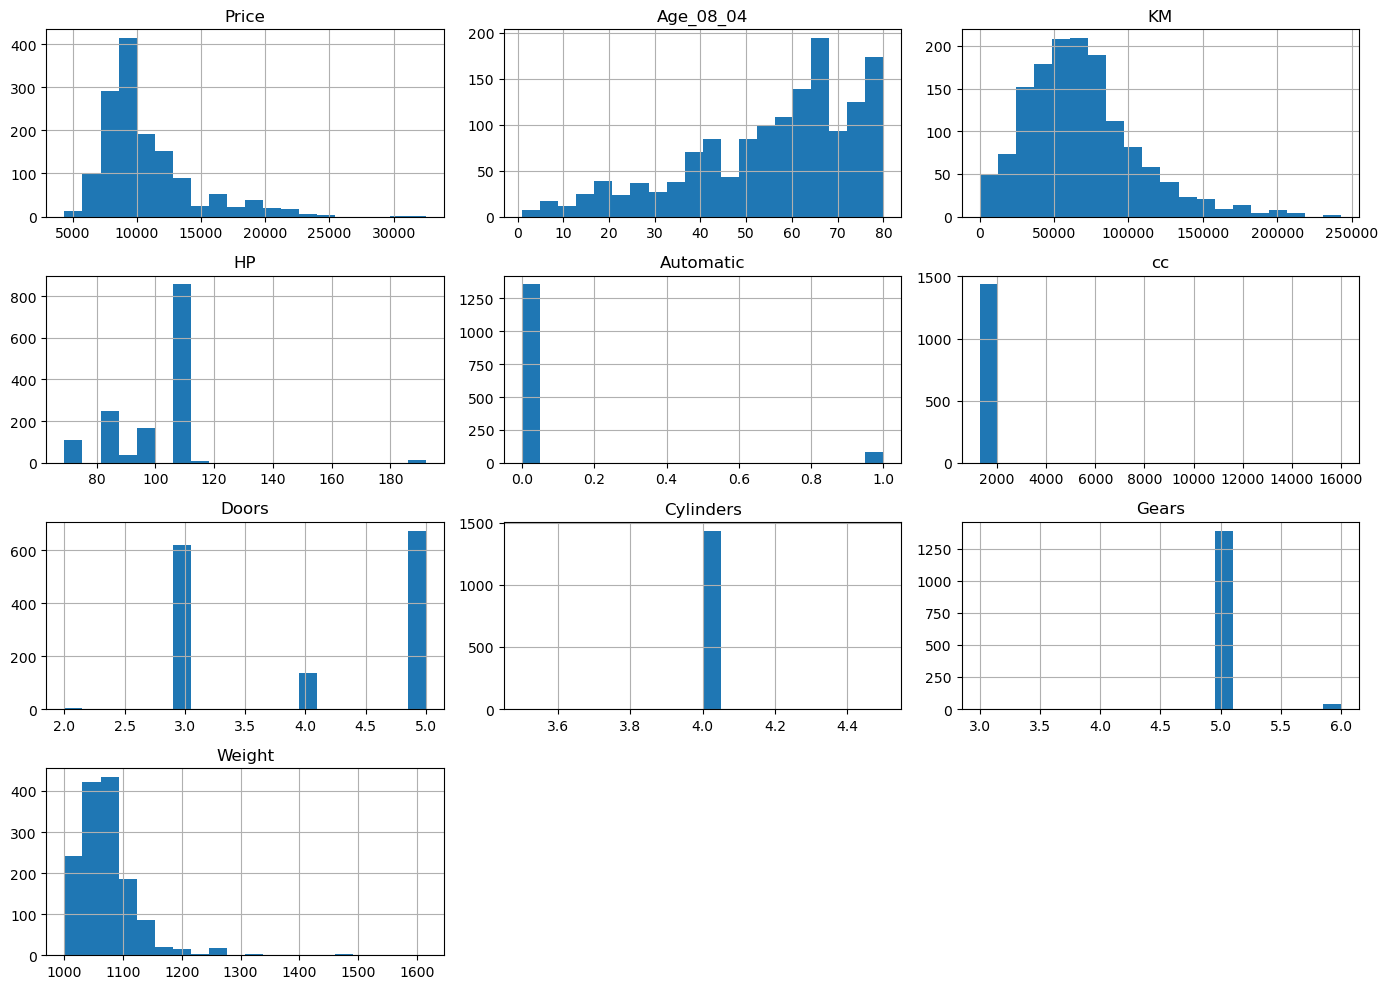

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


summary_stats = df.describe()


plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(14, 10), layout=(4, 3))
plt.tight_layout()
plt.show()



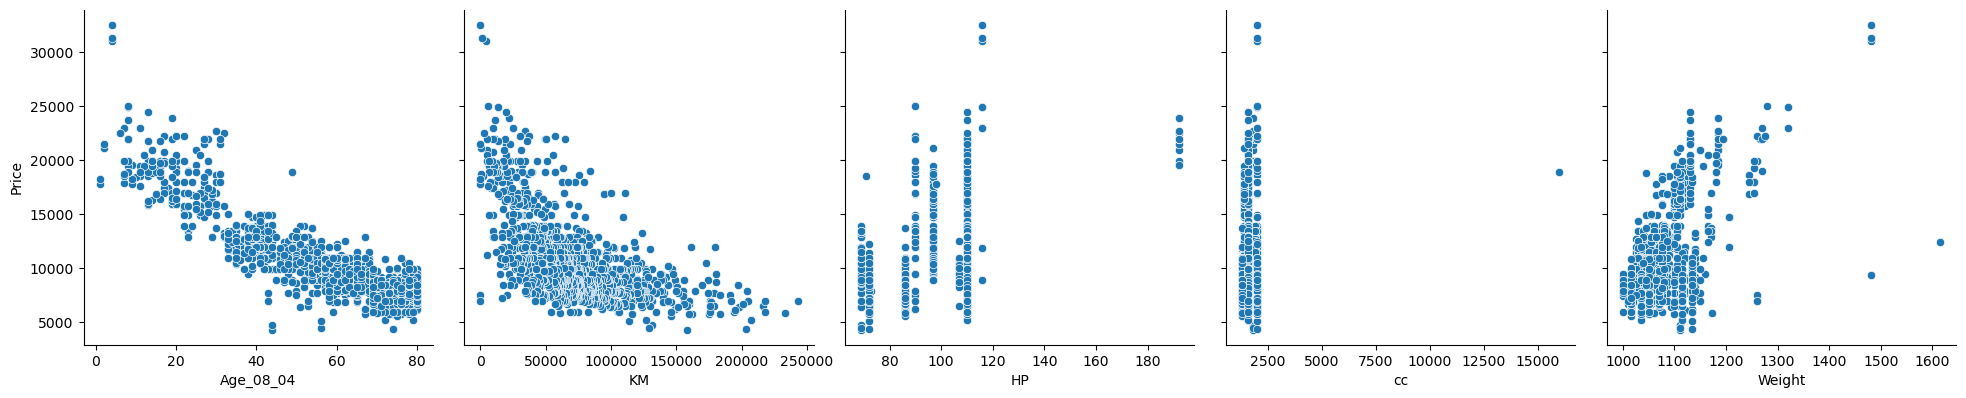

In [36]:

sns.pairplot(df, x_vars=['Age_08_04', 'KM', 'HP', 'cc', 'Weight'], y_vars='Price', height=4)
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4928\751095446.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


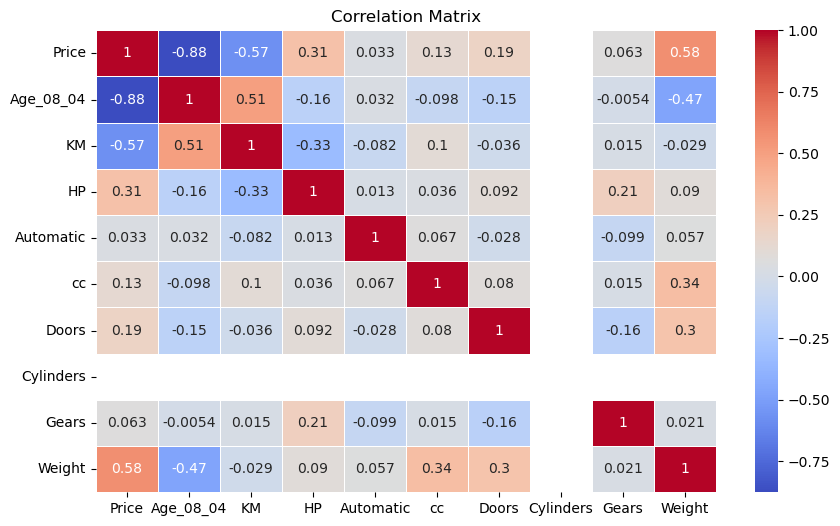

In [37]:
#  correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [38]:
summary_stats

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#  categorical variable 'Fuel_Type' using OneHotEncoder
categorical_features = ['Fuel_Type']
numerical_features = ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Weight']

# Preprocessing pipeline for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

# Split the data into features (X) and target (y)
X = df.drop(columns=['Price', 'Cylinders', 'Gears'])  # Dropping irrelevant columns for MLR
y = df['Price']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Multiple Linear Regression model pipeline
mlr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])


mlr_pipeline.fit(X_train, y_train)

# Make predictions 
y_pred = mlr_pipeline.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(2224306.040393545, 0.8332952678447363)

In [40]:
# Build and train Ridge and Lasso regression models

# Ridge regression
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge(alpha=1.0))])
ridge_pipeline.fit(X_train, y_train)
ridge_pred = ridge_pipeline.predict(X_test)

# Lasso regression
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Lasso(alpha=0.1))])
lasso_pipeline.fit(X_train, y_train)
lasso_pred = lasso_pipeline.predict(X_test)

# Evaluate Ridge and Lasso models
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

ridge_mse, ridge_r2, lasso_mse, lasso_r2


(2220831.9227937264,
 0.8335556420169213,
 2224002.7078074645,
 0.8333180016667007)

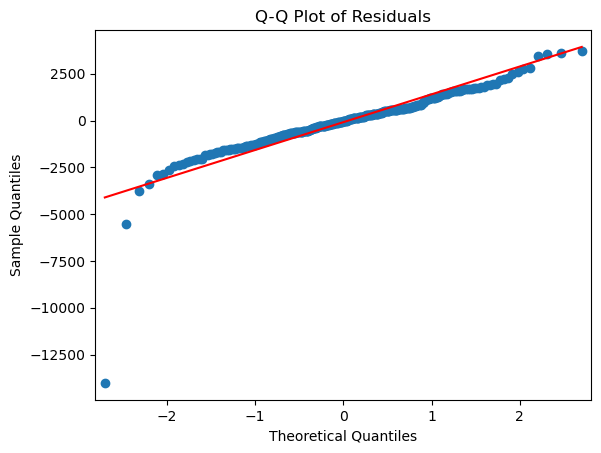

In [41]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Residual analysis after fitting the MLR model
# Extract the residuals and fitted values
residuals = y_test - y_pred
fitted_values = y_pred

# 1. Q-Q Plot for Normality of Residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()




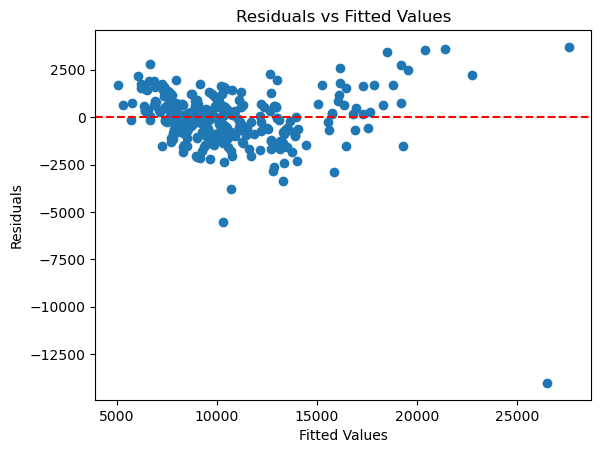

In [42]:
# 2. Residuals vs Fitted Values Plot
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

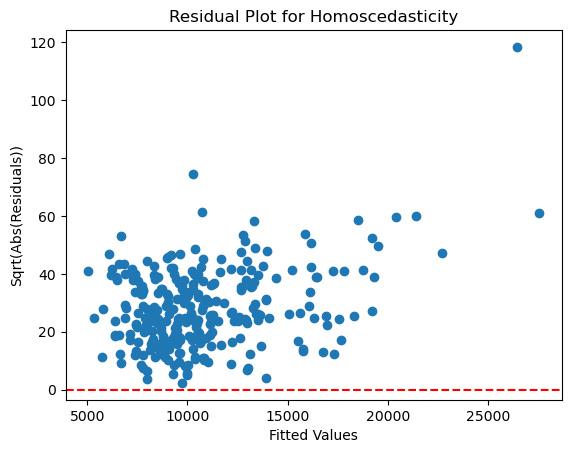

In [43]:
# 3. Residual Plot for Homoscedasticity
plt.scatter(fitted_values, np.sqrt(np.abs(residuals)))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Abs(Residuals))')
plt.title('Residual Plot for Homoscedasticity')
plt.show()


In [44]:
# 4. Detecting High Influence Points using Cook's Distance
# We refit the model using statsmodels to access influence measures
X_train_preprocessed = preprocessor.fit_transform(X_train)  # Preprocess training data
X_train_with_const = sm.add_constant(X_train_preprocessed)  # Add constant for intercept
ols_model = sm.OLS(y_train, X_train_with_const).fit()
influence = OLSInfluence(ols_model)

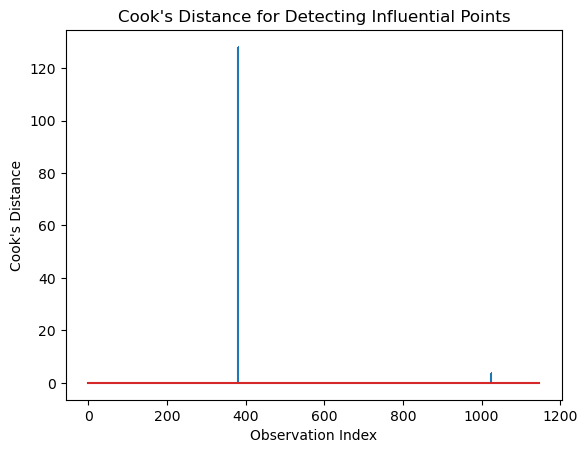

In [45]:
# Cook's Distance Plot
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Detecting Influential Points")
plt.show()
